In [1]:
import numpy as np
import numpy.random as npr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

### Visualisations

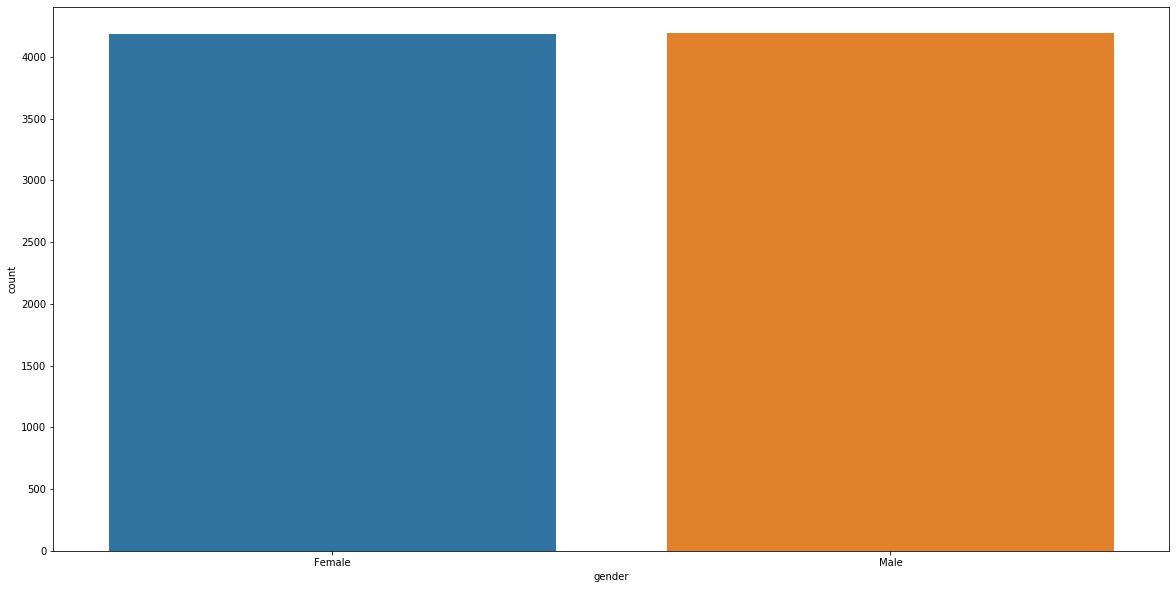

In [5]:
# Equilibre Hommes / Femmes

data['gender'] = data.gender.map({1 : 'Male', 0 : 'Female'})
plt.subplots(figsize=(20,10))
sns.countplot(x =data['gender'], data = data)

On peut remarquer qu'il y a autant des femmes que des hommes. Ce qui peut faciliter la comparaison.

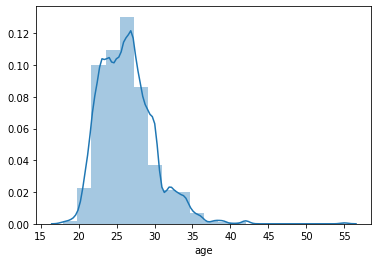

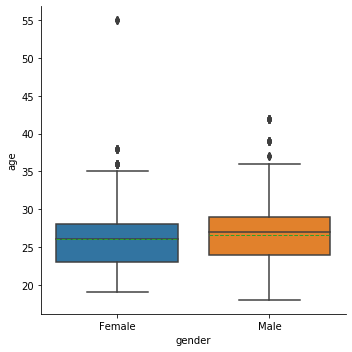

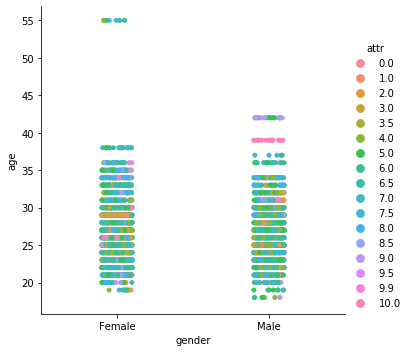

In [28]:
# La distribution d'âge 

data['age'].isnull().any()
data.loc[:,'age'] = data['age'].fillna(data['age'].median())

sns.distplot(data['age'], bins = 20)
sns.catplot(x='gender', y= 'age', data = data, kind = 'box',showmeans=True,meanline=True)


# La distribution d'âge par sex

sns.catplot(x='gender', y= 'age', data = data, hue = 'attr')

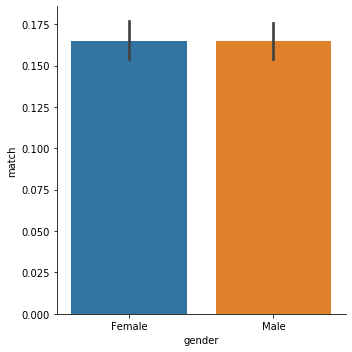

In [15]:
sns.catplot(x="gender", y="match", kind="bar", data= data)

<Figure size 648x576 with 0 Axes>

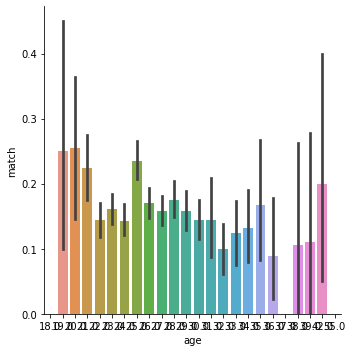

In [34]:
plt.figure(figsize=(9,8))
sns.catplot(x="age", y="match", kind="bar", data= data)

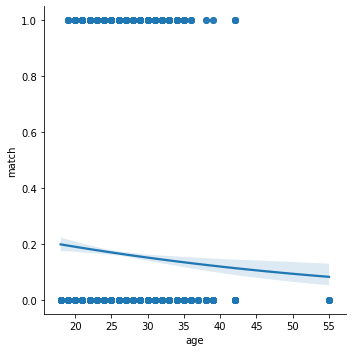

In [18]:
sns.lmplot(x="age", y="match", data=data, logistic=True)

In [57]:
# Regardons maintenant les attributs qui influencent les décisions de partenaires
# On regarde le niveau de représentativité de chaque attribut

atribut1 = data[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atribut1.columns = cols
explode = (0.6, 0, 0.6, 0, 0,0)

([<matplotlib.patches.Wedge at 0x1d84880b1c8>,
 [Text(1.2934401210422417, 1.1031829645522229, 'Attractive'),
  Text(-0.4153616772262156, 1.0185650087705866, 'Sincere'),
  Text(-1.6999954619026225, 0.003928041559006448, 'Intelligente'),
  Text(-0.41812944108710315, -1.0174319488281203, 'Fun'),
  Text(0.5202912766176515, -0.9691733526441875, 'Ambituous'),
  Text(1.0249520472256484, -0.39934108339607727, 'Shared Interests')],
 [Text(0.9130165560298176, 0.7787173867427456, '22.5%'),
  Text(-0.22656091485066301, 0.5555809138748654, '17.4%'),
  Text(-1.1999967966371452, 0.002772735218122199, '20.2%'),
  Text(-0.22807060422932895, -0.5549628811789746, '17.4%'),
  Text(0.2837952417914463, -0.5286400105331931, '10.7%'),
  Text(0.5590647530321717, -0.21782240912513304, '11.8%')])

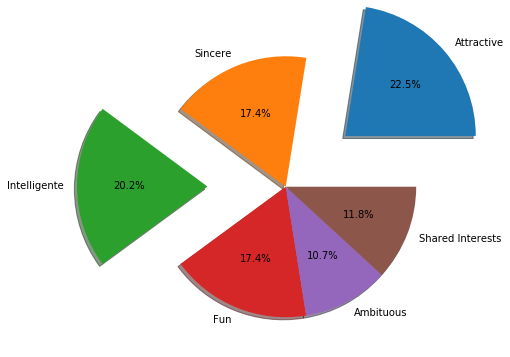

In [58]:
plt.figure(figsize = (8,6))
plt.pie(atribut1, labels=cols, explode = explode, autopct='%1.1f%%', shadow=True, startangle=0)

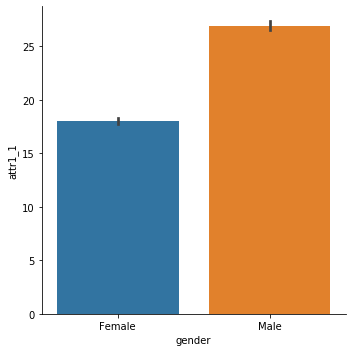

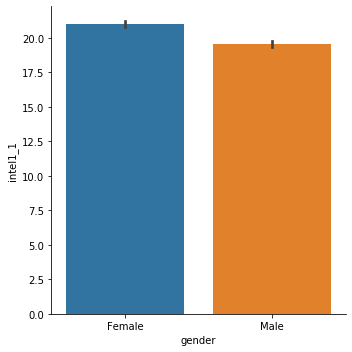

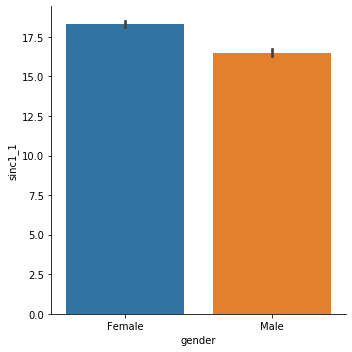

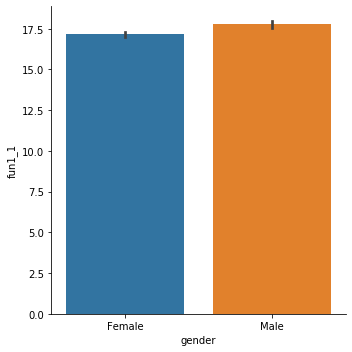

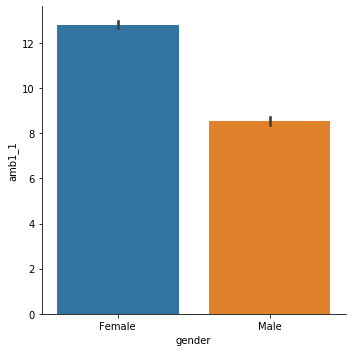

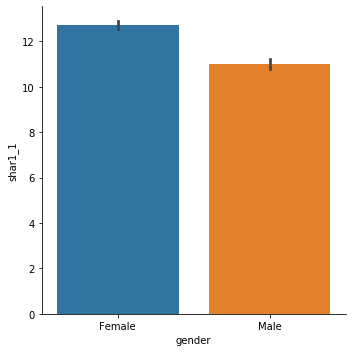

In [70]:
sns.catplot(x="gender", y="attr1_1", kind="bar", data= data)
sns.catplot(x="gender", y="intel1_1", kind="bar", data= data)
sns.catplot(x="gender", y="sinc1_1", kind="bar", data= data)
sns.catplot(x="gender", y="fun1_1", kind="bar", data= data)
sns.catplot(x="gender", y="amb1_1", kind="bar", data= data)
sns.catplot(x="gender", y="shar1_1", kind="bar", data= data)

([<matplotlib.patches.Wedge at 0x1d848600c08>,
 [Text(1.2934401210422417, 1.1031829645522229, 'Attractive'),
  Text(-0.4153616772262156, 1.0185650087705866, 'Sincere'),
  Text(-1.6999954619026225, 0.003928041559006448, 'Intelligente'),
  Text(-0.41812944108710315, -1.0174319488281203, 'Fun'),
  Text(0.5202912766176515, -0.9691733526441875, 'Ambituous'),
  Text(1.0249520472256484, -0.39934108339607727, 'Shared Interests')],
 [Text(0.9130165560298176, 0.7787173867427456, '22.5%'),
  Text(-0.22656091485066301, 0.5555809138748654, '17.4%'),
  Text(-1.1999967966371452, 0.002772735218122199, '20.2%'),
  Text(-0.22807060422932895, -0.5549628811789746, '17.4%'),
  Text(0.2837952417914463, -0.5286400105331931, '10.7%'),
  Text(0.5590647530321717, -0.21782240912513304, '11.8%')])

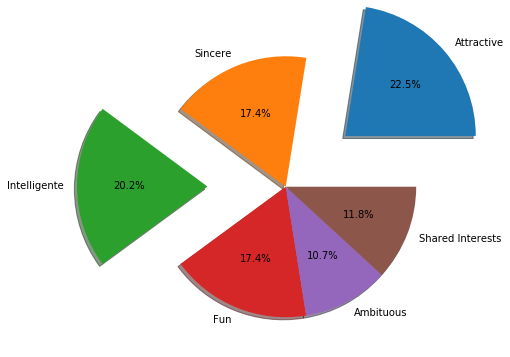

In [79]:
atribut2 = data[['attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atribut1.columns = cols
explode = (0.6, 0, 0.6, 0, 0,0)

plt.figure(figsize = (8,6))
plt.pie(atribut1, labels=cols, explode = explode, autopct='%1.1f%%', shadow=True, startangle=0)

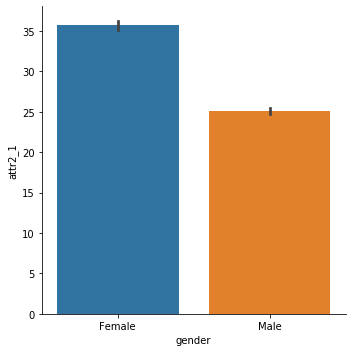

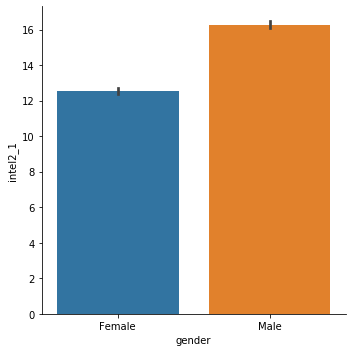

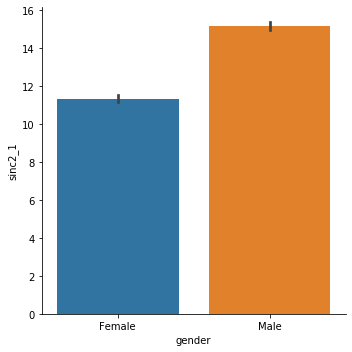

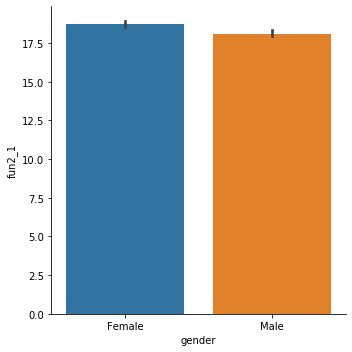

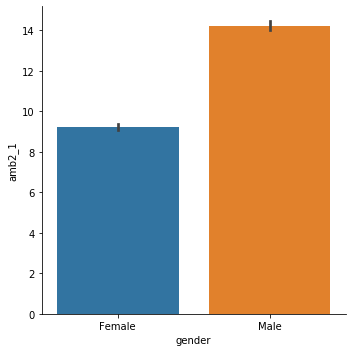

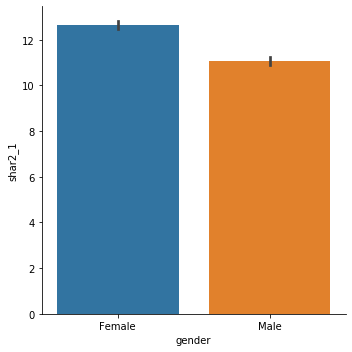

In [74]:
sns.catplot(x="gender", y="attr2_1", kind="bar", data= data)
sns.catplot(x="gender", y="intel2_1", kind="bar", data= data)
sns.catplot(x="gender", y="sinc2_1", kind="bar", data= data)
sns.catplot(x="gender", y="fun2_1", kind="bar", data= data)
sns.catplot(x="gender", y="amb2_1", kind="bar", data= data)
sns.catplot(x="gender", y="shar2_1", kind="bar", data= data)

In [80]:
data1 = data.iloc[:, 2:40]
data1.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race
0,Female,1,1,1,10,7,NaN,4,1,11.0,...,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0
1,Female,1,1,1,10,7,NaN,3,2,12.0,...,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0
2,Female,1,1,1,10,7,NaN,10,3,13.0,...,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0
3,Female,1,1,1,10,7,NaN,5,4,14.0,...,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0
4,Female,1,1,1,10,7,NaN,7,5,15.0,...,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
data.shape

(8378, 195)

In [5]:
data.describe(include ='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [47]:
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [36]:
data.isnull().any()

iid         False
id           True
gender      False
idg         False
condtn      False
wave        False
round       False
position    False
positin1     True
order       False
partner     False
pid          True
match       False
int_corr     True
samerace    False
age_o        True
race_o       True
pf_o_att     True
pf_o_sin     True
pf_o_int     True
pf_o_fun     True
pf_o_amb     True
pf_o_sha     True
dec_o       False
attr_o       True
sinc_o       True
intel_o      True
fun_o        True
amb_o        True
shar_o       True
like_o       True
prob_o       True
met_o        True
age          True
field        True
field_cd     True
undergra     True
mn_sat       True
tuition      True
race         True
imprace      True
imprelig     True
from         True
zipcode      True
income       True
goal         True
date         True
go_out       True
career       True
career_c     True
sports       True
tvsports     True
exercise     True
dining       True
museums      True
art       

In [38]:
100 * data.isnull().sum()/len(data)

iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
wave         0.000000
round        0.000000
position     0.000000
positin1    22.033898
order        0.000000
partner      0.000000
pid          0.119360
match        0.000000
int_corr     1.885892
samerace     0.000000
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
dec_o        0.000000
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal      

In [48]:
data = data.drop(['undergra','mn_sat','tuition'], axis=1)

## Observations des variables les plus corrélées

In [7]:
corr = data.corr()
corr

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,1.000000,0.117109,0.051937,0.120362,0.220413,0.996713,0.231881,0.081287,0.070443,0.090696,...,-0.003738,-0.005157,-0.117348,0.039944,-0.020409,0.092325,-0.053698,0.006949,0.100164,0.055229
id,0.117109,1.000000,-0.011623,0.998029,0.318768,0.091571,0.374462,0.168382,0.174008,0.149216,...,0.024213,-0.041815,-0.051621,-0.029917,0.010202,-0.018183,-0.007993,-0.088398,-0.046558,-0.119108
gender,0.051937,-0.011623,1.000000,0.033645,-0.002627,-0.001264,0.020630,-0.001091,0.005853,0.006685,...,-0.125433,-0.159709,0.023925,-0.144642,-0.058300,-0.103692,-0.289694,0.076538,-0.067432,0.055267
idg,0.120362,0.998029,0.033645,1.000000,0.324838,0.092645,0.387715,0.171495,0.177639,0.154691,...,0.020597,-0.051671,-0.051081,-0.036368,0.007404,-0.020785,-0.022967,-0.086071,-0.050316,-0.118940
condtn,0.220413,0.318768,-0.002627,0.324838,1.000000,0.219627,0.816316,0.329120,0.308641,0.324108,...,0.082965,0.034376,0.067836,0.066229,0.023614,0.068552,-0.063407,0.068622,0.114254,0.145598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,0.092325,-0.018183,-0.103692,-0.020785,0.068552,0.092906,0.025047,0.073360,0.201356,0.009776,...,0.851922,0.177047,0.444624,0.400945,0.222258,1.000000,0.197948,0.378176,0.406725,0.205368
sinc5_3,-0.053698,-0.007993,-0.289694,-0.022967,-0.063407,-0.028111,-0.027437,0.099616,0.102406,-0.010260,...,0.222731,0.614853,0.313755,0.184837,0.130029,0.197948,1.000000,0.505440,0.331171,0.268553
intel5_3,0.006949,-0.088398,0.076538,-0.086071,0.068622,0.000644,0.000923,0.093856,0.112979,-0.000037,...,0.351189,0.275642,0.681735,0.251750,0.263402,0.378176,0.505440,1.000000,0.270181,0.424972
fun5_3,0.100164,-0.046558,-0.067432,-0.050316,0.114254,0.103025,0.105866,0.148984,0.236393,0.043915,...,0.388431,0.172901,0.292684,0.775198,0.336507,0.406725,0.331171,0.270181,1.000000,0.398011


In [12]:
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [14]:
data['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [57]:
pd.options.display.max_rows = 30
a = data.corr()
abs(a['match']).sort_values(ascending = False)

match      1.000000
dec_o      0.522326
dec        0.521943
like_o     0.305853
like       0.305723
             ...   
id         0.000770
idg        0.000544
gender     0.000530
theater    0.000087
amb2_1     0.000028
Name: match, Length: 187, dtype: float64

In [66]:
list_top = list(abs(a['match']).sort_values(ascending = False).index[0:5])
print(list_top)

['match', 'dec_o', 'dec', 'like_o', 'like']


In [67]:
data2 = data[list_top]
data2.head()

,match,dec_o,dec,like_o,like
0,0,0,1,7.0,7.0
1,0,0,1,8.0,7.0
2,1,1,1,10.0,7.0
3,1,1,1,7.0,7.0
4,1,1,1,8.0,6.0


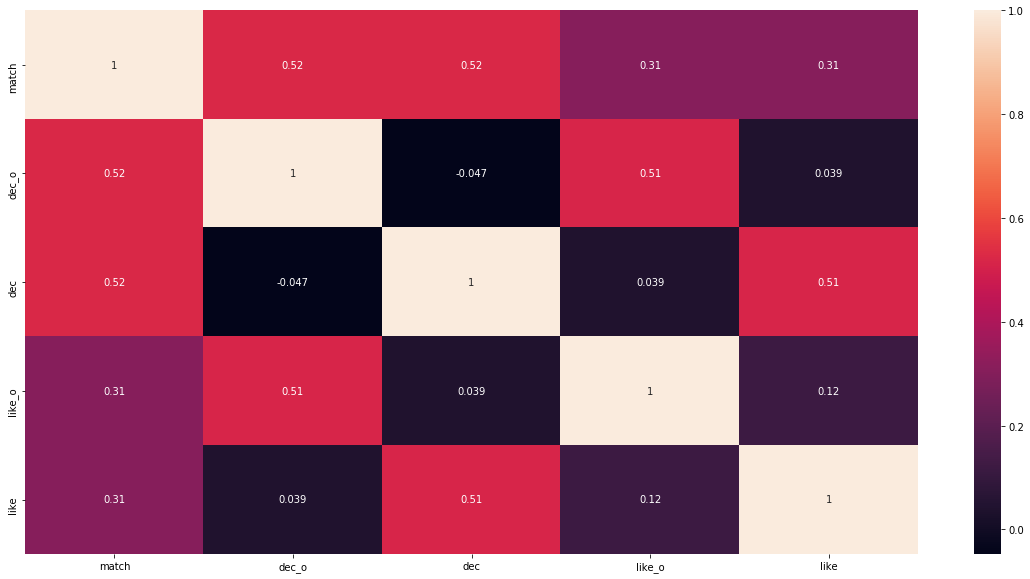

In [68]:
corr = data2.corr()
plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot = True)

### Visualisation

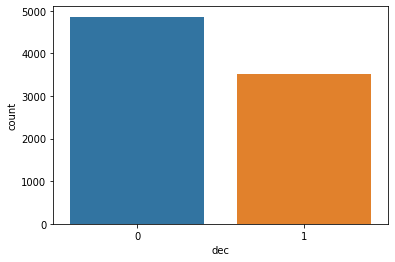

In [71]:
sns.countplot(data2['dec'])